<a href="https://colab.research.google.com/github/Mr-Moeen/Data-Analysis/blob/main/simple_analysis19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
df= pd.read_csv('/content/adult.data', header= None)
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.columns = column_names

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [8]:
gender_counts = df['sex'].str.strip().value_counts()
gender_counts

Male      21790
Female    10771
Name: sex, dtype: int64

In [11]:
average_age_women = df[df['sex'] == ' Female']['age'].mean()
average_age_women

36.85823043357163

In [12]:
german_count = df[df['native-country'] == ' Germany'].shape[0]
total_count = df.shape[0]
german_percentage = (german_count / total_count) * 100
german_count, german_percentage

(137, 0.42074874850281013)

In [21]:
stats_more_than_50K = df[df['income'] == ' >50K']['age'].agg(['mean', 'std'])
stats_less_than_50K = df[df['income'] == ' <=50K']['age'].agg(['mean', 'std'])

stats_more_than_50K, stats_less_than_50K

(mean    44.249841
 std     10.519028
 Name: age, dtype: float64,
 mean    36.783738
 std     14.020088
 Name: age, dtype: float64)

In [35]:
# Step 1: Verify the presence of 'education' and 'salary' columns in `df`
education_present = 'education' in df.columns
salary_present = 'income' in df.columns

# Step 2: If both columns are present, we proceed with the check
if education_present and salary_present:
    # Create a DataFrame of individuals earning more than $50K
    high_income_df = df[df['income'] == ' >50K']

    # List of education levels considered as high school or higher
    high_school_or_higher_edu = [
        ' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc',
        ' Masters', ' Doctorate', ' Some-college', ' HS-grad'
    ]

    # Step 3: Determine whether all individuals in `high_income_df` have at least a high school education
    has_at_least_high_school = high_income_df['education'].isin(high_school_or_higher_edu).all()
else:
    has_at_least_high_school = "The DataFrame 'df' is missing one or both of the required columns."

# Output the results of the verification and the check
education_present, salary_present, has_at_least_high_school


(True, True, False)

In [36]:
high_school_or_higher_edu = [' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate', ' Some-college', ' HS-grad']
high_income_df = df[df['income'] == ' >50K']
has_at_least_high_school = high_income_df['education'].isin(high_school_or_higher_edu).all()
has_at_least_high_school

False

In [39]:
age_stats_by_race_gender = df.groupby(['race', 'sex'])['age'].describe()
max_age_amer_indian_eskimo_men = df[(df['race'] == ' Amer-Indian-Eskimo') & (df['sex'] == ' Male')]['age'].max()
age_stats_by_race_gender, max_age_amer_indian_eskimo_men

(                               count       mean        std   min   25%   50%  \
 race                sex                                                        
  Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                      Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
  Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                      Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
  Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                      Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
  Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                      Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
  White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                      Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   
 
                          

In [41]:
men_df = df[df['sex'] == ' Male']
married_men_more_than_50K = men_df[(men_df['income'] == ' >50K') &
                                   (men_df['marital-status'].str.startswith(' Married'))].shape[0]
single_men_more_than_50K = men_df[(men_df['income'] == ' >50K') &
                                  (~men_df['marital-status'].str.startswith(' Married'))].shape[0]
total_married_men = men_df[men_df['marital-status'].str.startswith(' Married')].shape[0]
total_single_men = men_df.shape[0] - total_married_men
proportion_married_men_more_than_50K = married_men_more_than_50K / total_married_men
proportion_single_men_more_than_50K = single_men_more_than_50K / total_single_men

proportion_married_men_more_than_50K, proportion_single_men_more_than_50K

(0.4405139945351156, 0.08449509031397745)

In [52]:
max_hours_per_week = df['hours-per-week'].max()
num_people_max_hours = df[df['hours-per-week'] == max_hours_per_week].shape[0]

perc_earning_more_than_50k_max_hours = df[(df['hours-per-week'] == max_hours_per_week) & (df['income'] == ' >50K')].shape[0] / num_people_max_hours * 100
max_hours_per_week, num_people_max_hours, perc_earning_more_than_50k_max_hours

(99, 85, 29.411764705882355)

In [50]:
min_hours_per_week = df['hours-per-week'].min()

num_people_min_hours = df[df['hours-per-week'] == min_hours_per_week].shape[0]
perc_earning_more_than_50k_min_hours = df[(df['hours-per-week'] == min_hours_per_week) & (df['income'] == ' >50K')].shape[0] / num_people_min_hours * 100 if num_people_min_hours > 0 else 0
min_hours_per_week,num_people_min_hours,  perc_earning_more_than_50k_min_hours

(1, 20, 10.0)

In [54]:
# Step 1: Filter for individuals earning more than $50K
high_earners_df = df[df['income'] == ' >50K']

# Step 2: Select the relevant columns
high_earners_info = high_earners_df[['native-country', 'hours-per-week', 'income']]

# Step 3: Group by 'native-country' and calculate the average 'hours-per-week'
average_hours_by_country = high_earners_info.groupby('native-country')['hours-per-week'].mean().reset_index()

average_hours_by_country
# Group by 'native-country', then calculate the average 'hours-per-week' and count of individuals
country_stats = high_earners_df.groupby('native-country')['hours-per-week'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
country_stats.columns = ['Native Country', 'Average Hours per Week', 'Count of Individuals']

country_stats



,Native Country,Average Hours per Week,Count of Individuals
0,?,45.547945,146
1,Cambodia,40.000000,7
2,Canada,45.641026,39
3,China,38.900000,20
4,Columbia,50.000000,2
5,Cuba,42.440000,25
6,Dominican-Republic,47.000000,2
7,Ecuador,48.750000,4
8,El-Salvador,45.000000,9
9,England,44.533333,30


In [67]:
# Check unique values in the 'native-country' column
unique_countries = df['native-country'].unique()
print(unique_countries)


[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [70]:

df_filtered = df[df['native-country'] != ' ?']


most_frequent_country = df['native-country'].mode()[0]
df['native-country'].replace(' ?', most_frequent_country, inplace=True)



In [55]:
num_people_usa = df[df['native-country'] == ' United-States'].shape[0]
num_people_usa
# Use value_counts() to get counts of each unique value in 'native-country'
country_counts = df['native-country'].value_counts()

# Look up the count for the United States
num_people_usa_value_counts = country_counts[' United-States']
num_people_usa_value_counts


29170

In [63]:
# Normalize 'native-country' by stripping leading/trailing spaces and count rows for India
num_people_ind = df[df['native-country'].str.strip() == 'Germany'].shape[0]
num_people_ind


137

In [44]:
average_hours_per_country = df.groupby(['native-country', 'income'])['hours-per-week'].mean().unstack()
average_hours_japan = average_hours_per_country.loc[' Japan']
average_hours_per_country, average_hours_japan

(income                           <=50K       >50K
 native-country                                   
  ?                           40.164760  45.547945
  Cambodia                    41.416667  40.000000
  Canada                      37.914634  45.641026
  China                       37.381818  38.900000
  Columbia                    38.684211  50.000000
  Cuba                        37.985714  42.440000
  Dominican-Republic          42.338235  47.000000
  Ecuador                     38.041667  48.750000
  El-Salvador                 36.030928  45.000000
  England                     40.483333  44.533333
  France                      41.058824  50.750000
  Germany                     39.139785  44.977273
  Greece                      41.809524  50.625000
  Guatemala                   39.360656  36.666667
  Haiti                       36.325000  42.750000
  Holand-Netherlands          40.000000        NaN
  Honduras                    34.333333  60.000000
  Hong                        3

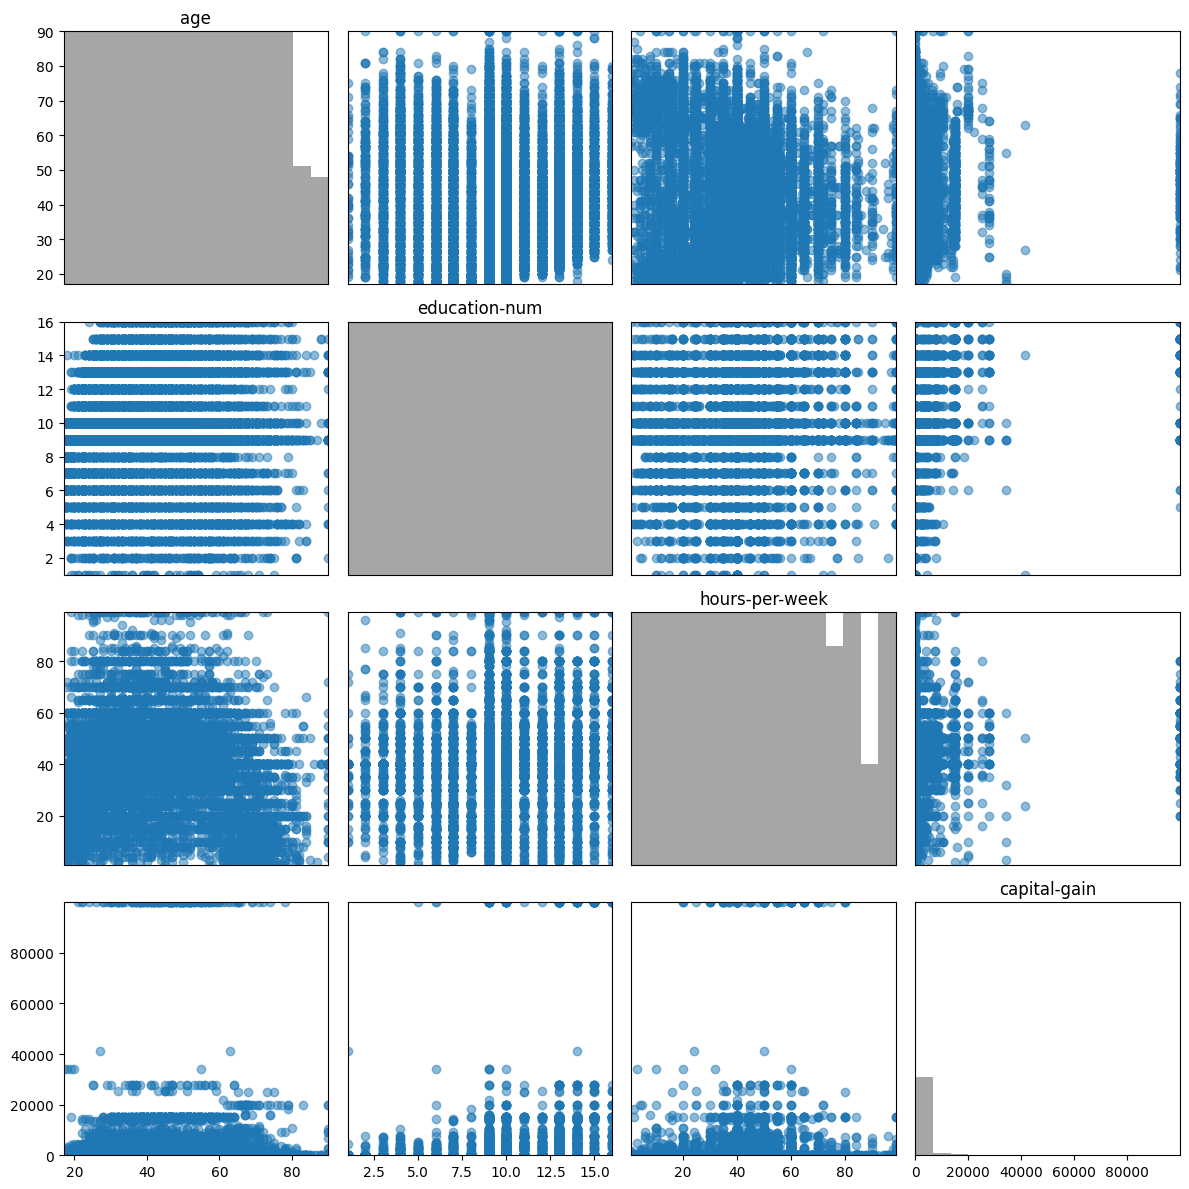

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and already loaded with the data
subset_df = df[['age', 'education-num', 'hours-per-week', 'capital-gain']]

# Define the number of variables to plot
num_vars = len(subset_df.columns)
fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(12, 12))

# Plot each pair of variables on its subplot
for i in range(num_vars):
    for j in range(num_vars):
        if i == j:  # Diagonal: plot a histogram
            axes[i, j].hist(subset_df.iloc[:, i], bins=15, color='gray', alpha=0.7)
            axes[i, j].set_title(subset_df.columns[i])
        else:  # Off-diagonal: plot a scatter plot
            axes[i, j].scatter(subset_df.iloc[:, j], subset_df.iloc[:, i], alpha=0.5)

        # Hide x-axis labels for top rows and y-axis labels for right columns
        if i < num_vars - 1: axes[i, j].xaxis.set_visible(False)
        if j > 0: axes[i, j].yaxis.set_visible(False)

        # Set the same x and y limits for each row and column
        axes[i, j].set_xlim(subset_df.iloc[:, j].min(), subset_df.iloc[:, j].max())
        axes[i, j].set_ylim(subset_df.iloc[:, i].min(), subset_df.iloc[:, i].max())

# Adjust the layout
plt.tight_layout()
plt.show()


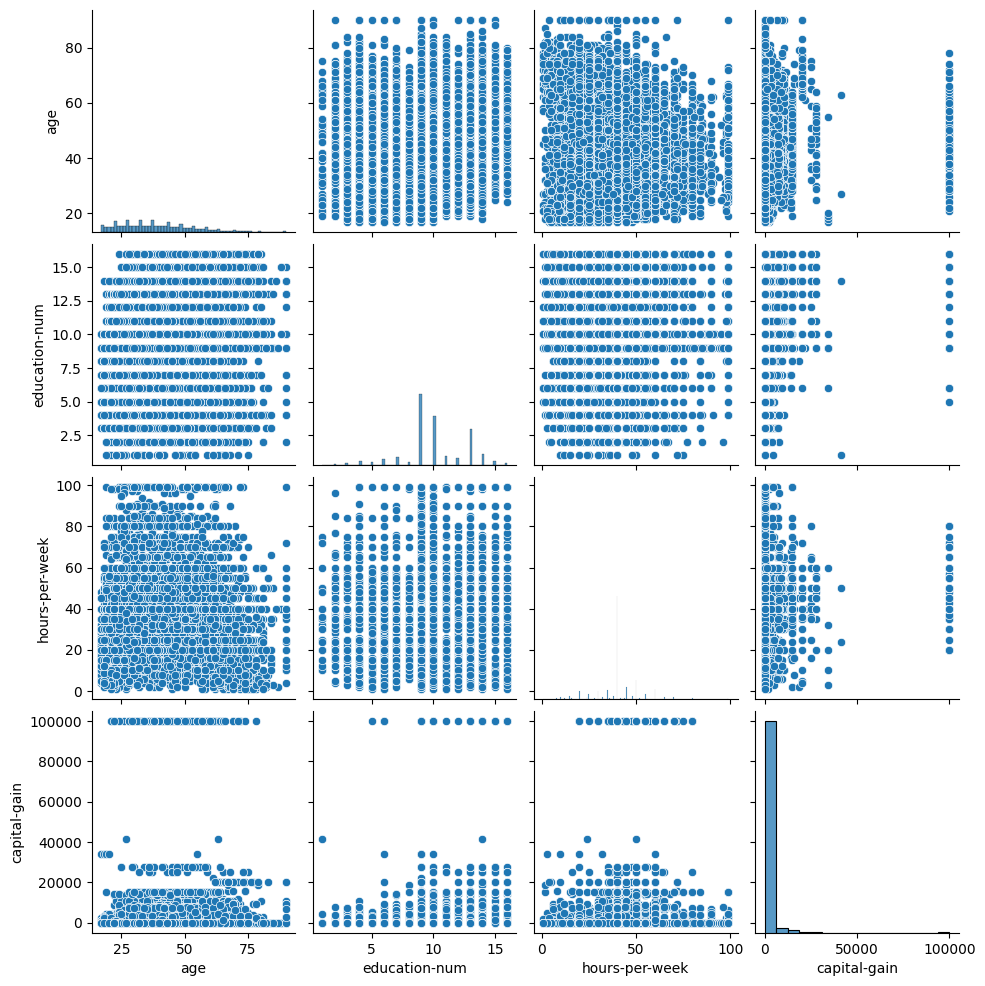

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of the dataframe with the important features
subset_df = df[['age', 'education-num', 'hours-per-week', 'capital-gain']]

# Creating the pair plot
sns.pairplot(subset_df)

plt.show()
